In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load iris.csv into pandas dataframe
iris = pd.read_csv("iris.csv")


In [27]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
print(iris.shape)

(150, 5)


In [17]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [18]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

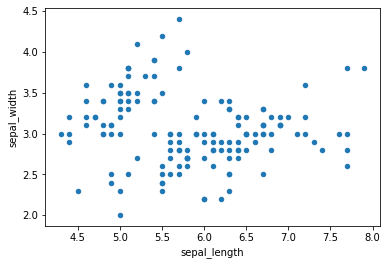

In [20]:
#2-D scatter plot:
# labels and scale
iris.plot(kind='scatter', x='sepal_length',y='sepal_width');
plt.show()

In [3]:
y.shape

(150,)

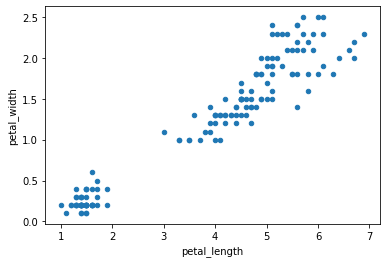

In [21]:
#2-D scatter plot:
# labels and scale
iris.plot(kind='scatter', x='petal_length',y='petal_width');
plt.show()

In [25]:
#2-D scatter plot with color for each flower type
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="species",size=4) \ 
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend();
plt.show();

SyntaxError: unexpected character after line continuation character (<ipython-input-25-692138fccd0e>, line 3)

# Pair - plot of IRIS dataset


G:\Anaconda installation\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


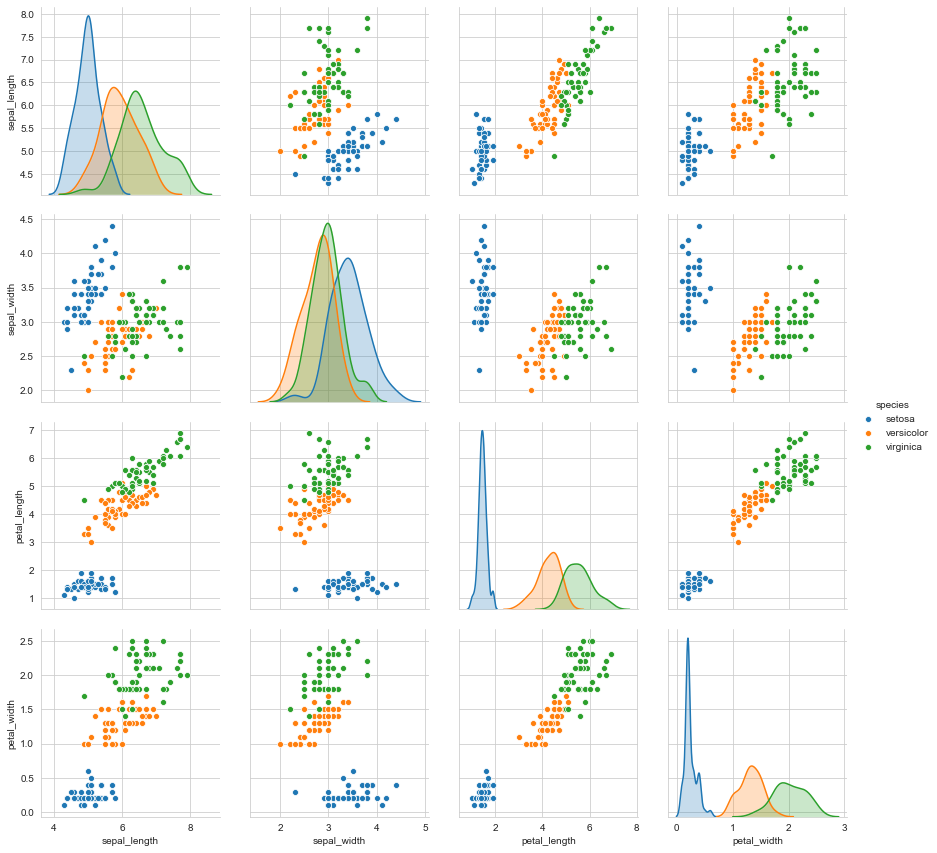

In [26]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(iris,hue="species",size=3,diag_kind="kde");
plt.show()

# Check IRIS Verginica or not using Logistic Regression

G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


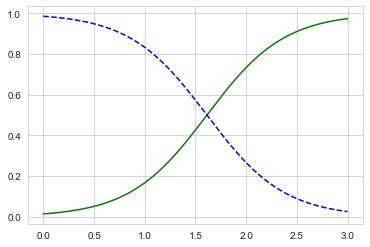

In [28]:
#load IRIS dataset with 150 points
from sklearn import datasets
iris = datasets.load_iris()

import numpy as np 
import matplotlib.pyplot as plt
X1 = iris["data"][:,3:] #petal width, the data whcih one's width is 3
y1 = (iris["target"]==2).astype(np.int) #1 if iris virginina,else 0,the target or label of iris virginica is 2

#now lets train logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X1,y1) #fit the value of data and target of virginica
#let's look at the model's estimated probabilites for flowers with petal widths varying from 0 to 3 cm

#numpy, linspace: numpy.linspace(start,stop,num=50). -num : int, optional Number of samples to generate. Default is 50. Must be non-negative.
X_new = np.linspace(0,3,1000).reshape(-1,1) 
y_proba = log_reg.predict_proba(X_new) #predict_proba: Compute probabilities of possible outcomes for samples 
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica") #whcih value is 1
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica") #which's value is 0

# Here Using K-Nearest Neighbour on IRIS dataset


In [38]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
knn = KNeighborsClassifier(n_neighbors =3)
y_pred = knn.fit(X_train,y_train).predict(X_test)



In [39]:
from sklearn.metrics import accuracy_score
print("Test accuracy")
print(accuracy_score(y_test,y_pred,normalize=True,sample_weight=None))

Test accuracy
0.9333333333333333


# Now using 5 neigbors to find KNN

In [62]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
knn = KNeighborsClassifier(n_neighbors =5)
y_pred_2 = knn.fit(X_train,y_train).predict(X_test)

In [63]:
y_train_pred_1 = knn.fit(X_train,y_train).predict(X_train)
print("Train accuracy using KNN ")
print(accuracy_score(y_train,y_train_pred_1,normalize=True,sample_weight=None))

Train accuracy using KNN 
0.9733333333333334


In [64]:
from sklearn.metrics import accuracy_score
print("Test accuracy")
print(accuracy_score(y_test,y_pred_2,normalize=True,sample_weight=None))

Test accuracy
0.96


# Using Naive Bayes on IRIS dataset

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
gnb = GaussianNB()
y_pred_3 = gnb.fit(X_train,y_train).predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print("Test accuracy using Naive Bayes")
print(accuracy_score(y_test,y_pred_3,normalize=True,sample_weight=None))

Test accuracy using Naive Bayes
0.9466666666666667


In [45]:
y_train_pred = gnb.fit(X_train,y_train).predict(X_train)
print("Train accuracy using Naive Bayes")
print(accuracy_score(y_train,y_train_pred,normalize=True,sample_weight=None))

Train accuracy using Naive Bayes
0.9733333333333334


# Using Decision Tree on IRIS dataset

In [51]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
clf = tree.DecisionTreeClassifier()
y_predict = clf.fit(X_train,y_train).predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print("Test accuracy using Decision Tree")
print(accuracy_score(y_test,y_predict,normalize=True,sample_weight=None))

Test accuracy using Decision Tree
0.95


In [53]:
y_train_predict = gnb.fit(X_train,y_train).predict(X_train)
print("Train accuracy using Naive Bayes")
print(accuracy_score(y_train,y_train_predict,normalize=True,sample_weight=None))

Train accuracy using Naive Bayes
0.9777777777777777


# Using Random Forest on IRIS dataset

In [58]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf_2 = RandomForestClassifier(max_depth=2,random_state=0)
y_predict_1 = clf_2.fit(X_train,y_train).predict(X_test)


G:\Anaconda installation\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
from sklearn.metrics import accuracy_score
print("Test accuracy using Random Forest")
print(accuracy_score(y_test,y_predict_1,normalize=True,sample_weight=None))

Test accuracy using Random Forest
0.9555555555555556


In [61]:
y_train_predict_1 = gnb.fit(X_train,y_train).predict(X_train)
print("Train accuracy using Random Forest")
print(accuracy_score(y_train,y_train_predict_1,normalize=True,sample_weight=None))

Train accuracy using Random Forest
0.9428571428571428


# Here using Neural Network's MLP on IRIS dataset

In [65]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [66]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [69]:
# the data, shuffled and split between train and test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [72]:
X_train = X_train/ 255
X_test = X_test/ 255

In [73]:
print(X_train)

[[0.01960784 0.00784314 0.01372549 0.00392157]
 [0.0254902  0.01176471 0.02156863 0.00705882]
 [0.02627451 0.01294118 0.02235294 0.00980392]
 [0.02352941 0.00862745 0.01960784 0.00588235]
 [0.02627451 0.00980392 0.0227451  0.00705882]
 [0.02196078 0.00980392 0.01529412 0.00431373]
 [0.03019608 0.01176471 0.02392157 0.00901961]
 [0.02470588 0.01294118 0.01843137 0.00627451]
 [0.02156863 0.00941176 0.01490196 0.00431373]
 [0.02470588 0.01058824 0.01921569 0.00705882]
 [0.02470588 0.01098039 0.02       0.00588235]
 [0.01921569 0.00980392 0.01764706 0.00666667]
 [0.02470588 0.00980392 0.01960784 0.00745098]
 [0.02745098 0.01254902 0.01843137 0.0054902 ]
 [0.0254902  0.01176471 0.02039216 0.00784314]
 [0.02352941 0.01333333 0.01764706 0.00627451]
 [0.01882353 0.01215686 0.00627451 0.00078431]
 [0.0227451  0.01058824 0.02       0.00745098]
 [0.02196078 0.01058824 0.01647059 0.00509804]
 [0.02196078 0.01137255 0.01411765 0.00509804]
 [0.02156863 0.00980392 0.01568627 0.00509804]
 [0.02392157 

In [74]:
print(y_train)

[1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


In [75]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [76]:
# some model parameters

output_dim = 10
input_dim = X_train

batch_size = 128 
nb_epoch = 20

In [77]:
#here buildin a model
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim,activation='softmax'))


In [78]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test)) 


# Classifying the iris Data set with Keras

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [83]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

#one hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:,np.newaxis]).toarray()

# scale data to have mean 0 and variance 1 which is importance 
# for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split the data set into training and testing
X_train, X_test ,Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.5,random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

G:\Anaconda installation\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


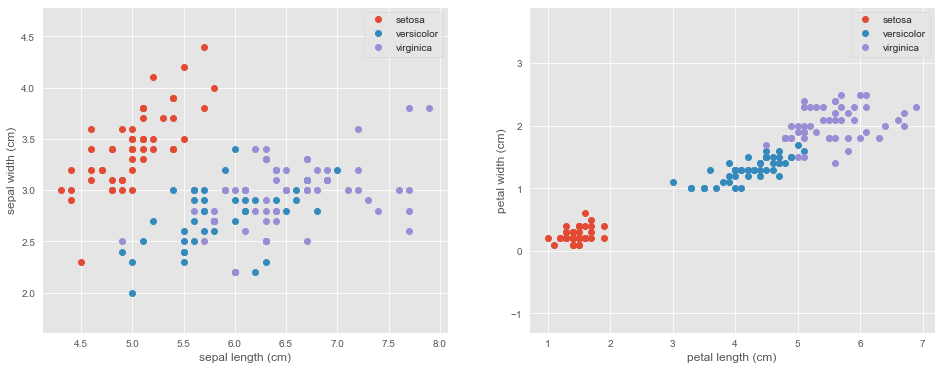

In [84]:
# visualize the data sets
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:,0],X_plot[:,1],linestyle='none',marker='o',label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1,2,2)
for target, target_name in enumerate(names):
    X_plot = X[y==target]
    plt.plot(X_plot[:,2],X_plot[:,3],linestyle='none',marker='o',label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [86]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim,nodes,n=1,name='model'):
    def create_model(): # creating a model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes,input_dim=input_dim,activation='relu'))
        model.add(Dense(output_dim,activation='softmax'))
        
        #compile model
        model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
        return model
    return create_model
models = [create_custom_model(n_features,n_classes,8,i,'model_{}'.format(i)) for i in range(1,4)]
for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

In [95]:
from keras.callbacks import TensorBoard
history_dict = {}
# TensorBoard Callback
cb = TensorBoard()
for create_model in models:
    model = create_model()
    print('Model name:',model.name)
    history_callback = model.fit(X_train,Y_train,
                                batch_size=5,
                                epochs=50,
                                verbose=0,
                                validation_data=(X_test,Y_test))
    score = model.evaluate(X_test,Y_test,verbose=0)
    print('Test loss:',score[0])
    print('Test accuracy:',score[1])
    history_dict[model.name] = [history_callback,model]
    

Model name: model_1
Test loss: 0.3383163261413574
Test accuracy: 0.8533333539962769
Model name: model_2
Test loss: 0.24640619158744811
Test accuracy: 0.9866666793823242
Model name: model_3
Test loss: 0.19755468467871348
Test accuracy: 0.9466666579246521


No handles with labels found to put in legend.


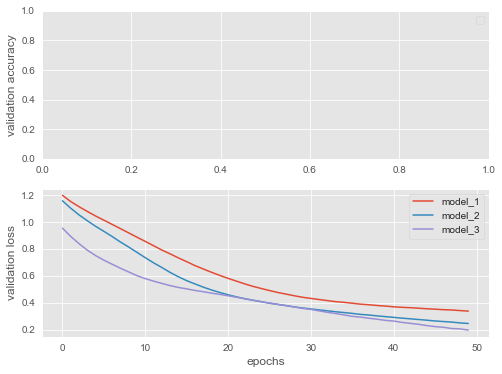

In [104]:
#Let's have a look how our models perform. We can clearly see that adding more nodes makes the training perform better.
fig, (ax1,ax2) = plt.subplots(2,figsize=(8,6))
for model_name in history_dict:
    #val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
   # ax1.plot(val_acc,label=model_name)
    ax2.plot(val_loss,label=model_name)
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

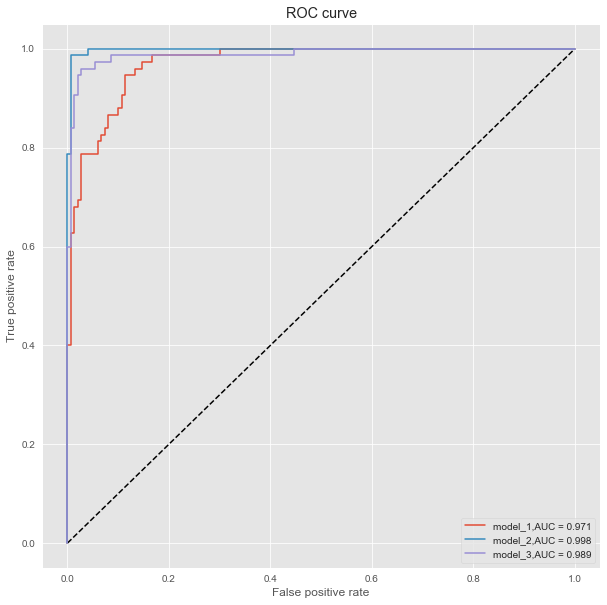

In [105]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
for model_name in history_dict:
    model = history_dict[model_name][1]
    Y_pred = model.predict(X_test)
    fpr,tpr,threshold = roc_curve(Y_test.ravel(),Y_pred.ravel())
    plt.plot(fpr,tpr,label='{},AUC = {:.3f}'.format(model_name,auc(fpr,tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [107]:
# measure performance with cross validation
# finally wee measure performance with 10 fold cross validation for the model_3 by using keras classifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
create_model = create_custom_model(n_features,n_classes,8,3)
estimator = KerasClassifier(build_fn=create_model,epochs=100,batch_size=5,verbose=0)
scores = cross_val_score(estimator, X_scaled,Y,cv=10)
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(scores.mean(),scores.std()))

Accuracy: 0.95 (+/- 0.07)
